In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [177]:
train = pd.read_csv('train.csv')
train['stroke'].value_counts(normalize=True)

0    0.952299
1    0.047701
Name: stroke, dtype: float64

In [178]:
train=train.drop("id",axis=1)
train['bmi'].isna().sum()

train['smoking_status'].value_counts(normalize=True)

never smoked       0.369374
Unknown            0.300636
formerly smoked    0.174168
smokes             0.155822
Name: smoking_status, dtype: float64

In [179]:
train['bmi']=train['bmi'].fillna(train['bmi'].mean())
s=pd.get_dummies(train['gender'])
work=pd.get_dummies(train['work_type'])
marrid=pd.get_dummies(train['ever_married'])
residence=pd.get_dummies(train['Residence_type']) 
smoking=pd.get_dummies(train['smoking_status']) 
train=pd.concat([train,s,work,marrid,residence,smoking],axis=1) 
train=train.drop(['gender','ever_married','work_type','Residence_type','smoking_status','Other'], axis=1 )
x= train.drop('stroke',axis=1)
y=train['stroke']

In [133]:
train

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     36.0             0              0              67.29  36.7       0   
1     34.0             0              0              83.53  48.5       0   
2     60.0             0              0              65.16  30.8       0   
3     75.0             0              0              78.80  29.3       1   
4     76.0             0              0              58.65  25.6       0   
...    ...           ...            ...                ...   ...     ...   
4083  53.0             1              0              98.61  38.8       0   
4084  61.0             0              0              72.01  26.0       0   
4085  44.0             0              0              94.71  28.4       0   
4086  21.0             0              0             120.94  29.7       0   
4087  58.0             1              0              59.52  33.2       0   

      Female  Male  Govt_job  Never_worked  ...  Self-employed  children  No  \
0          1     0         0             0  ...              0         0   0   
1          1     0         0             0  ...              0         0   0   
2          0     1         0             0  ...              0         0   0   
3          1     0         0             0  ...              1         0   0   
4          0     1         0             0  ...              0         0   0   
...      ...   ...       ...           ...  ...            ...       ...  ..   
4083       1     0         1             0  ...              0         0   0   
4084       1     0         0             0  ...              0         0   0   
4085       0     1         0             0  ...              0         0   0   
4086       0     1         0             0  ...              0         0   1   
4087       1     0         1             0  ...              0         0   0   

      Yes  Rural  Urban  Unknown  formerly smoked  never smoked  smokes  
0       1      1      0        0                1             0       0  
1       1      1      0        0                1             0       0  
2       1      1      0        0                0             1       0  
3       1      1      0        0                1             0       0  
4       1      0      1        0                0             0       1  
...   ...    ...    ...      ...              ...           ...     ...  
4083    1      1      0        0                0             0       1  
4084    1      1      0        0                1             0       0  
4085    1      1      0        0                0             0       1  
4086    0      0      1        0                1             0       0  
4087    1      1      0        0                0             1       0  

[4088 rows x 21 columns]

<Axes: ylabel='count'>

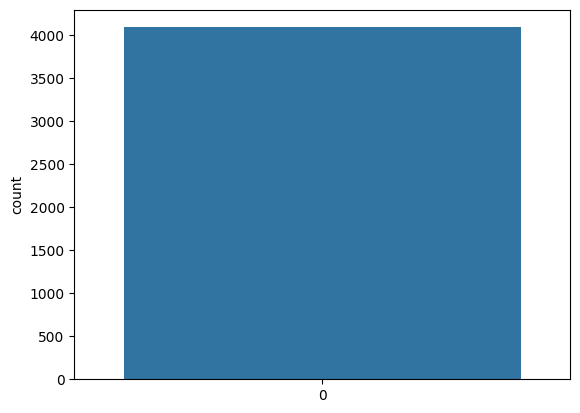

In [180]:
sns.countplot(train['stroke'])

In [181]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
smote =  SMOTE(random_state=0)
x_train, y_train = smote.fit_resample(x_train, y_train)
x_test, y_test = smote.fit_resample(x_test,y_test)



In [182]:
y_train.value_counts()

1    2725
0    2725
Name: stroke, dtype: int64

In [189]:
t=KNeighborsClassifier(n_neighbors=7, weights='distance',algorithm='ball_tree')
t.fit(x_train,y_train)
y_pre=t.predict(x_test)

In [190]:
print(metrics.accuracy_score(y_test,y_pre))

0.7054794520547946


In [191]:
test=pd.read_csv('test.csv')
id=test['id']
test=test.drop("id",axis=1)
s=pd.get_dummies(test['gender'])
work=pd.get_dummies(test['work_type'])
test['bmi']=test['bmi'].fillna(test['bmi'].mean())
marrid=pd.get_dummies(test['ever_married'])
residence=pd.get_dummies(test['Residence_type'])
smoking=pd.get_dummies(test['smoking_status'])
test=pd.concat([test,s,work,marrid,residence,smoking],axis=1)
test=test.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis=1 )

In [192]:
y_pre2 =t.predict(test)

In [193]:
datatest=pd.DataFrame({'id': id,'stroke':y_pre2})
datatest.to_csv('pre.csv',index=False)
p=pd.read_csv('pre.csv')

In [194]:
p

id  stroke
0     61960       0
1     31741       0
2     59451       0
3     40670       0
4     25391       0
...     ...     ...
1017   2953       0
1018  47799       0
1019  61013       1
1020  66400       0
1021   9013       0

[1022 rows x 2 columns]